In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import os

In [90]:
# make table with env settings
# invert color when screenshot

|             | Hydrogen Sulfide | Methane | CO2 | Water | Brightness | Heat |
|-------------|------------------|---------|-----|-------|------------|------|
| Environment 1 |     0.1        |    0.1  |  0.8| 0.9   |  0.8       |  0.35|
| Environment 2 |      0.6       |  0.6    |  0.8 | 0,9     | 0.1     |  0.65|

In [91]:
optimal_p_data = pd.read_csv(os.getcwd() + '\\data_optimal_p.csv')
optimal_c_data = pd.read_csv(os.getcwd() + '\\data_optimal_c.csv')

In [92]:
scores_p = [optimal_p_data[f'{i}_scores'].to_list() for i in range(len(optimal_p_data))]
scores_p = [[-1 * i for i in scores_p[j]] for j in range(len(scores_p))]
scores_c = [optimal_c_data[f'{i}_scores'].to_list() for i in range(len(optimal_c_data))]
scores_c = [[-1 * i for i in scores_c[j]] for j in range(len(scores_c))]

In [93]:
p_avgs = [np.mean(i) for i in scores_p]
c_avgs = [np.mean(i) for i in scores_c]

p_maxes  = [max(i) for i in scores_p]
c_maxes  = [max(i) for i in scores_c]

epochs = len(p_avgs)

In [94]:
p_se = [np.std(i)/np.sqrt(epochs) for i in scores_p]
c_se = [np.std(i)/np.sqrt(epochs) for i in scores_c]

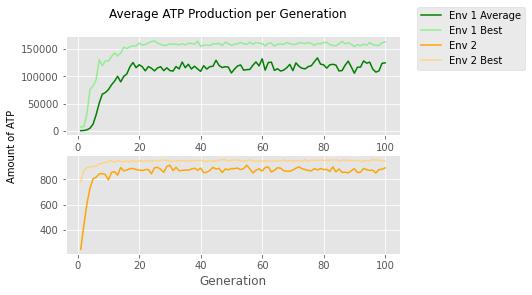

In [95]:
x = [i + 1 for i in range(100)]

plt.style.use('ggplot')

fig, axs = plt.subplots(2)
fig.suptitle('Average ATP Production per Generation')
fig.text(-.01, .5, 'Amount of ATP', va='center', rotation='vertical')
axs[0].set_xlabel('Generation')
axs[0].plot(x, p_avgs,c='green',label='Env 1 Average')
axs[0].plot(x, p_maxes,c='#90EE90',label='Env 1 Best')
#plt.errorbar(x, p_avgs, yerr=p_se)
axs[1].set_xlabel('Generation')
axs[1].plot(x, c_avgs,c='orange',label='Env 2')
axs[1].plot(x, c_maxes,c='#FFD580',label='Env 2 Best')
#plt.errorbar(x, c_avgs, yerr=c_se)
fig.legend(bbox_to_anchor=(1.2, 1))
plt.show()

# say somewhere what the standard error was

In [ ]:
env_1_label = 'Env 1'
env_2_label = 'Env 2'

In [96]:
pc1_vectors = [optimal_p_data[f'{i}_decoded'].to_list() for i in range(len(optimal_p_data))]
pc1_vectors = [[(literal_eval(k)[0], literal_eval(k)[1])  for k in j] for j in pc1_vectors]
pc1_gen_first = pc1_vectors[0]
pc1_gen_last = pc1_vectors[-1]

pc2_vectors = [optimal_c_data[f'{i}_decoded'].to_list() for i in range(len(optimal_c_data))]
pc2_vectors = [[(literal_eval(k)[0], literal_eval(k)[1])  for k in j] for j in pc2_vectors]
pc2_gen_first = pc2_vectors[0]
pc2_gen_last = pc2_vectors[-1]

In [97]:
pc1_gen_first_mean = (np.mean([i[0] for i in pc1_gen_first]), np.mean([i[1] for i in pc1_gen_first]))
pc2_gen_first_mean = (np.mean([i[0] for i in pc2_gen_first]), np.mean([i[1] for i in pc2_gen_first]))

z1 = [np.sqrt((i[0]-pc1_gen_first_mean[0])**2 + (i[1]-pc1_gen_first_mean[1])**2) for i in pc1_gen_first]
z2 = [np.sqrt((i[0]-pc2_gen_first_mean[0])**2 + (i[1]-pc2_gen_first_mean[1])**2) for i in pc2_gen_first]

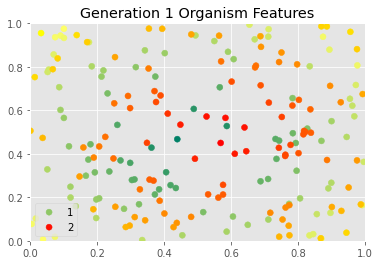

In [98]:
plt.title('Generation 1 Organism Features')
plt.xlim((0,1))
plt.ylim((0,1))
plt.scatter([i[0] for i in pc1_gen_first], [i[1] for i in pc1_gen_first], c=z1, cmap='summer', label='1')
plt.scatter([i[0] for i in pc2_gen_first], [i[1] for i in pc2_gen_first], c=z2, cmap='autumn', label='2')
plt.legend()
plt.show()

In [99]:
pc1_gen_last_mean = (np.mean([i[0] for i in pc1_gen_last]), np.mean([i[1] for i in pc1_gen_last]))
pc2_gen_last_mean = (np.mean([i[0] for i in pc2_gen_last]), np.mean([i[1] for i in pc2_gen_last]))

z1 = [np.sqrt((i[0]-pc1_gen_last_mean[0])**2 + (i[1]-pc1_gen_last_mean[1])**2) for i in pc1_gen_last]
z2 = [np.sqrt((i[0]-pc2_gen_last_mean[0])**2 + (i[1]-pc2_gen_last_mean[1])**2) for i in pc2_gen_last]

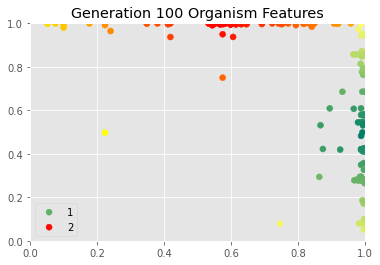

In [101]:
plt.title(f'Generation {epochs} Organism Features (P v C)')
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Photosynthetic Expression')
plt.xlabel('Chemosynthetic Expression')
plt.scatter([i[0] for i in pc1_gen_last], [i[1] for i in pc1_gen_last], c=z1, cmap='summer', label=env_1_label)
plt.scatter([i[0] for i in pc2_gen_last], [i[1] for i in pc2_gen_last], c=z2, cmap='autumn', label=env_2_label)
plt.legend(loc='lower left')
plt.show()

In [3]:
p_pm_vectors = [optimal_p_data[f'{i}_decoded'].to_list() for i in range(len(optimal_p_data))]
p_pm_vectors = [[(literal_eval(k)[0], literal_eval(k)[2])  for k in j] for j in pm_vectors]
p_cm_vectors = [[(literal_eval(k)[1], literal_eval(k)[2])  for k in j] for j in pm_vectors]
p_pm_gen_first = p_pm_vectors[0]
p_pm_gen_last = p_pm_vectors[-1]
p_cm_gen_first = p_pm_vectors[0]
p_cm_gen_last = p_pm_vectors[-1]

c_pm_vectors = [optimal_c_data[f'{i}_decoded'].to_list() for i in range(len(optimal_c_data))]
c_pm_vectors = [[(literal_eval(k)[0], literal_eval(k)[2])  for k in j] for j in cm_vectors]
c_cm_vectors = [[(literal_eval(k)[1], literal_eval(k)[2])  for k in j] for j in cm_vectors]
c_pm_gen_first = c_pm_vectors[0]
c_pm_gen_last = c_pm_vectors[-1]
c_cm_gen_first = c_pm_vectors[0]
c_cm_gen_last = c_pm_vectors[-1]

NameError: name 'optimal_p_data' is not defined

In [ ]:
p_pm_gen_first_mean = (np.mean([i[0] for i in p_pm_gen_first]), np.mean([i[1] for i in p_pm_gen_first]))
c_pm_gen_first_mean = (np.mean([i[0] for i in c_pm_gen_first]), np.mean([i[1] for i in c_pm_gen_first]))

z1 = [np.sqrt((i[0]-p_pm_gen_first_mean[0])**2 + (i[1]-p_pm_gen_first_mean[1])**2) for i in p_pm_gen_first]
z2 = [np.sqrt((i[0]-c_pm_gen_first_mean[0])**2 + (i[1]-c_pm_gen_first_mean[1])**2) for i in c_pm_gen_first]

In [ ]:
plt.title(f'Generation 1 Organism Features (P v M)')
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Photesynthetic Expression')
plt.xlabel('Microvili Expression')
plt.scatter([i[0] for i in p_pm_gen_first], [i[1] for i in p_pm_gen_first], c=z1, cmap='summer', label='1')
plt.scatter([i[0] for i in c_pm_gen_first], [i[1] for i in c_pm_gen_first], c=z2, cmap='autumn', label='2')
plt.legend(loc='lower left')
plt.show()

In [ ]:
p_cm_gen_first_mean = (np.mean([i[0] for i in p_cm_gen_first]), np.mean([i[1] for i in p_cm_gen_first]))
c_cm_gen_first_mean = (np.mean([i[0] for i in c_cm_gen_first]), np.mean([i[1] for i in c_cm_gen_first]))

z1 = [np.sqrt((i[0]-p_cm_gen_first_mean[0])**2 + (i[1]-p_cm_gen_first_mean[1])**2) for i in p_cm_gen_first]
z2 = [np.sqrt((i[0]-c_cm_gen_first_mean[0])**2 + (i[1]-c_cm_gen_first_mean[1])**2) for i in c_cm_gen_first]

In [ ]:
plt.title(f'Generation 1 Organism Features (C v M)')
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Chemosynthetic Expression')
plt.xlabel('Microvili Expression')
plt.scatter([i[0] for i in p_cm_gen_first], [i[1] for i in p_cm_gen_first], c=z1, cmap='summer', label=env_1_label)
plt.scatter([i[0] for i in c_cm_gen_first], [i[1] for i in c_cm_gen_first], c=z2, cmap='autumn', label=env_2_label)
plt.legend(loc='lower left')
plt.show()

In [ ]:
p_cm_gen_last_mean = (np.mean([i[0] for i in p_cm_gen_last]), np.mean([i[1] for i in p_cm_gen_last]))
c_cm_gen_last_mean = (np.mean([i[0] for i in c_cm_gen_last]), np.mean([i[1] for i in c_cm_gen_last]))

z1 = [np.sqrt((i[0]-p_cm_gen_last_mean[0])**2 + (i[1]-p_cm_gen_last_mean[1])**2) for i in p_cm_gen_last]
z2 = [np.sqrt((i[0]-c_cm_gen_last_mean[0])**2 + (i[1]-c_cm_gen_last_mean[1])**2) for i in c_cm_gen_last]

In [ ]:
plt.title(f'Generation {epochs} Organism Features (C v M)')
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Chemosynthetic Expression')
plt.xlabel('Microvili Expression')
plt.scatter([i[0] for i in p_cm_gen_last], [i[1] for i in p_cm_gen_last], c=z1, cmap='summer', label=env_1_label)
plt.scatter([i[0] for i in c_cm_gen_last], [i[1] for i in c_cm_gen_last], c=z2, cmap='autumn', label=env_2_label)
plt.legend(loc='lower left')
plt.show()

In [ ]:
p_pm_gen_last_mean = (np.mean([i[0] for i in p_pm_gen_last]), np.mean([i[1] for i in p_pm_gen_last]))
c_pm_gen_last_mean = (np.mean([i[0] for i in c_pm_gen_last]), np.mean([i[1] for i in c_pm_gen_last]))

z1 = [np.sqrt((i[0]-p_pm_gen_last_mean[0])**2 + (i[1]-p_pm_gen_last_mean[1])**2) for i in p_pm_gen_last]
z2 = [np.sqrt((i[0]-c_pm_gen_last_mean[0])**2 + (i[1]-c_pm_gen_last_mean[1])**2) for i in c_pm_gen_last]

In [ ]:
plt.title(f'Generation {epochs} Organism Features (P v M)')
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Photosynthetic Expression')
plt.xlabel('Microvili Expression')
plt.scatter([i[0] for i in p_pm_gen_last], [i[1] for i in p_pm_gen_last], c=z1, cmap='summer', label=env_1_label)
plt.scatter([i[0] for i in c_pm_gen_last], [i[1] for i in c_pm_gen_last], c=z2, cmap='autumn', label=env_2_label)
plt.legend(loc='lower left')
plt.show()

In [ ]:
a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = pl.imshow(a, cmap="summer")
plt.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="h", cax=cax)

a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap="autumn")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="h", cax=cax)